In [144]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

## Load all the data from the menu.csv to the dataframe

In [145]:
df = pd.read_csv("menu.csv")
df.head()

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,...,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,...,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,...,30,10,4,17,2,21,6,0,25,10


### 1a) Plot the histogram of the Calories. Comment on the datatype of the features.
1. Nominal: Category, Item.
2. Interval: Serving Size, Calories, Calories from Fat, Saturated Fat, Trans Fat, Cholesterol, Sodium, Carbohydrates, Dietary Fiber, Sugars, Protein.
3. Ratio: Total Fat (% Daily Value), Saturated Fat (% Daily Value), Sodium (% Daily Value), Carbohydrates (% Daily Value), Dietary Fiber (% Daily Value), Vitamin A (% Daily Value), Vitamin C (% Daily Value), Calcium (% Daily Value), Iron (% Daily Value).

Category                          object
Item                              object
Serving Size                      object
Calories                           int64
Calories from Fat                  int64
Total Fat                        float64
Total Fat (% Daily Value)          int64
Saturated Fat                    float64
Saturated Fat (% Daily Value)      int64
Trans Fat                        float64
Cholesterol                        int64
Cholesterol (% Daily Value)        int64
Sodium                             int64
Sodium (% Daily Value)             int64
Carbohydrates                      int64
Carbohydrates (% Daily Value)      int64
Dietary Fiber                      int64
Dietary Fiber (% Daily Value)      int64
Sugars                             int64
Protein                            int64
Vitamin A (% Daily Value)          int64
Vitamin C (% Daily Value)          int64
Calcium (% Daily Value)            int64
Iron (% Daily Value)               int64
dtype: object

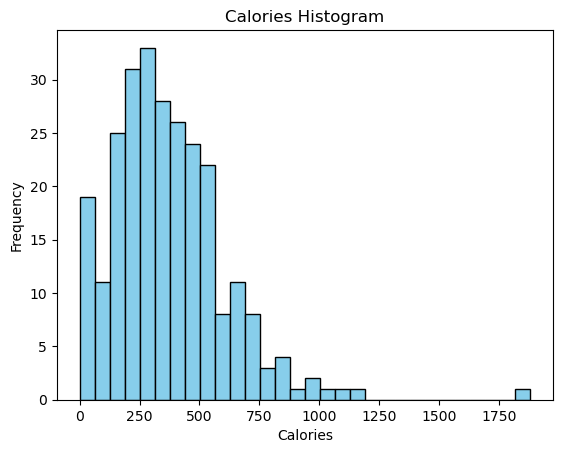

In [146]:
plt.hist(x=df[['Calories']], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Calories')
plt.ylabel('Frequency')
plt.title('Calories Histogram')
df.dtypes

### 1b) Plot the correlation heatmap between features and Calories (Hint: It will be a 21×21 matrix). You may notice that the diagonal elements are always 1. Explain the reason
> Answer: The diagonal elements are always 1 because this is the correlation of the same thing. For example, Calories vs Calories.

<Axes: >

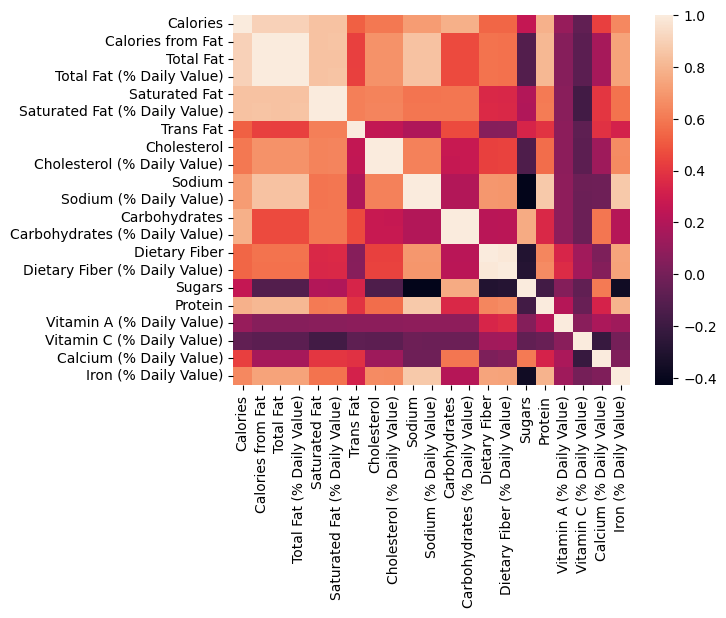

In [147]:
corr = df[['Calories', 'Calories from Fat', 'Total Fat', 'Total Fat (% Daily Value)', 'Saturated Fat', 
           'Saturated Fat (% Daily Value)', 'Trans Fat', 'Cholesterol', 'Cholesterol (% Daily Value)',
           'Sodium', 'Sodium (% Daily Value)', 'Carbohydrates', 'Carbohydrates (% Daily Value)', 'Dietary Fiber',
           'Dietary Fiber (% Daily Value)', 'Sugars', 'Protein', 'Vitamin A (% Daily Value)', 'Vitamin C (% Daily Value)',
           'Calcium (% Daily Value)', 'Iron (% Daily Value)'
          ]].corr()
sns.heatmap(data=corr)

### 1c) List the features which have the second and third largest positive correlation with Calories. Note: if you encounter multiple features actually mean the same thing, only list the feature with the largest correlation. For instance, if you see Sodium and Sodium (%Daily Value) and the former has larger correlation with Calories, list Sodium only.
> Answer: "Second largest feature: Total Fat and the third largest feature: Saturated Fat (% Daily Value)"

In [148]:
print(corr['Calories'].sort_values(ascending=False))

Calories                         1.000000
Calories from Fat                0.904588
Total Fat                        0.904409
Total Fat (% Daily Value)        0.904123
Saturated Fat (% Daily Value)    0.847631
Saturated Fat                    0.845564
Protein                          0.787847
Carbohydrates                    0.781539
Carbohydrates (% Daily Value)    0.781242
Sodium (% Daily Value)           0.713415
Sodium                           0.712309
Iron (% Daily Value)             0.643552
Cholesterol                      0.596399
Cholesterol (% Daily Value)      0.595208
Dietary Fiber (% Daily Value)    0.540014
Dietary Fiber                    0.538894
Trans Fat                        0.522441
Calcium (% Daily Value)          0.428426
Sugars                           0.259598
Vitamin A (% Daily Value)        0.108844
Vitamin C (% Daily Value)       -0.068747
Name: Calories, dtype: float64


### 1d) Report all features which have negative correlation with Calories. Does your result meet your expectation?
> Answer: Vitamin C (% Daily Value)

### 2a) Plot the scatter plot for ‘features vs. Calories’ for all features found in 1(c) and 1(d)

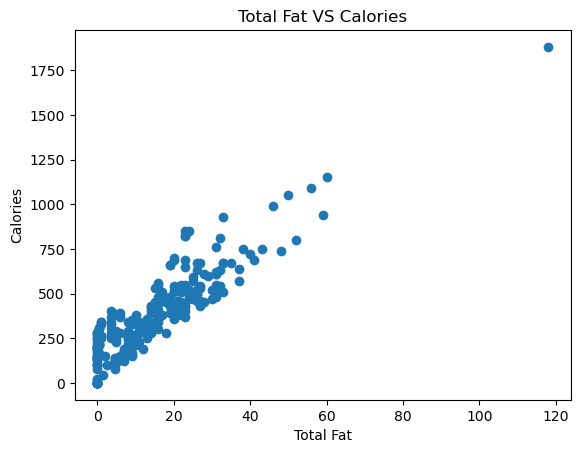

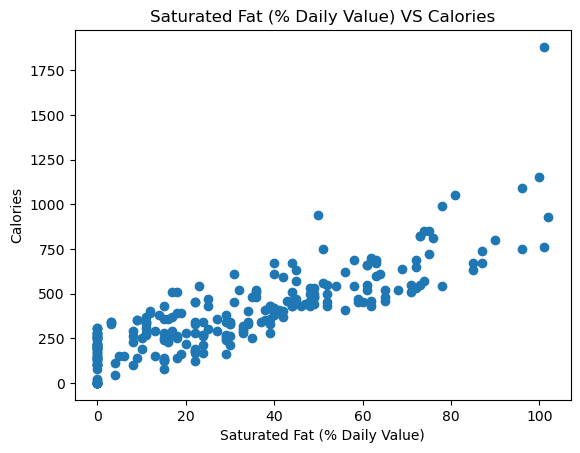

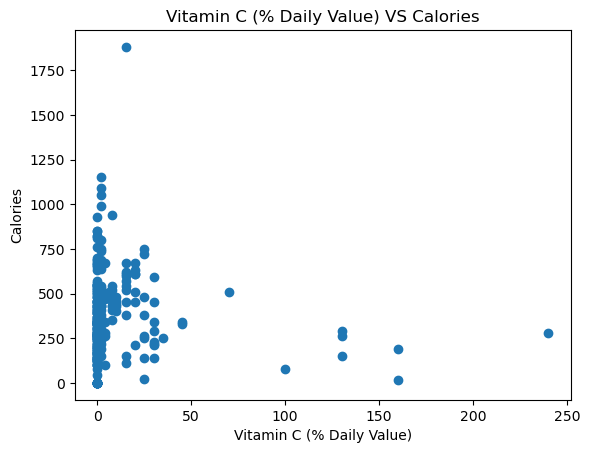

In [149]:
plt.scatter(df[['Total Fat']], df[['Calories']])
plt.xlabel('Total Fat')
plt.ylabel('Calories')
plt.title('Total Fat VS Calories')
plt.show()

plt.scatter(df[['Saturated Fat (% Daily Value)']], df[['Calories']])
plt.xlabel('Saturated Fat (% Daily Value)')
plt.ylabel('Calories')
plt.title('Saturated Fat (% Daily Value) VS Calories')
plt.show()

plt.scatter(df[['Vitamin C (% Daily Value)']], df[['Calories']])
plt.xlabel('Vitamin C (% Daily Value)')
plt.ylabel('Calories')
plt.title('Vitamin C (% Daily Value) VS Calories')
plt.show()

### 2b) Plot the box plot for all features found in 1(c) and 1(d) correspondingly.

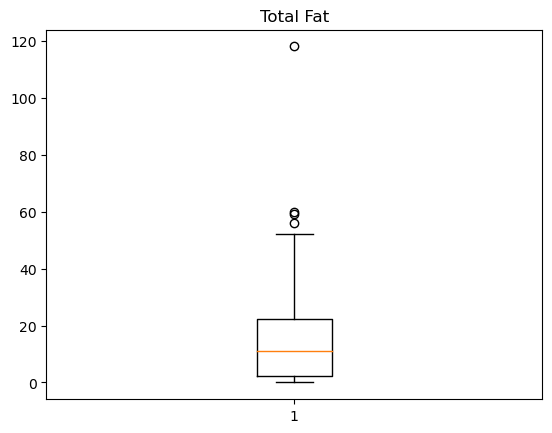

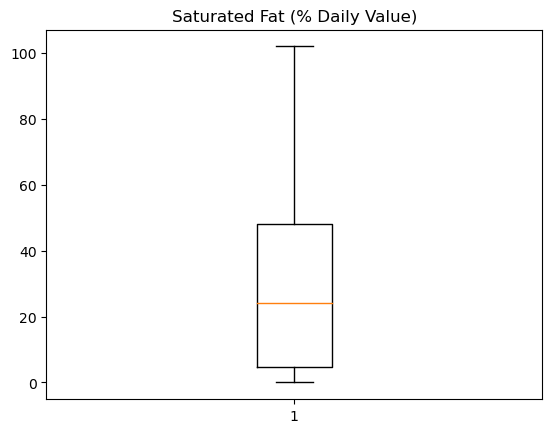

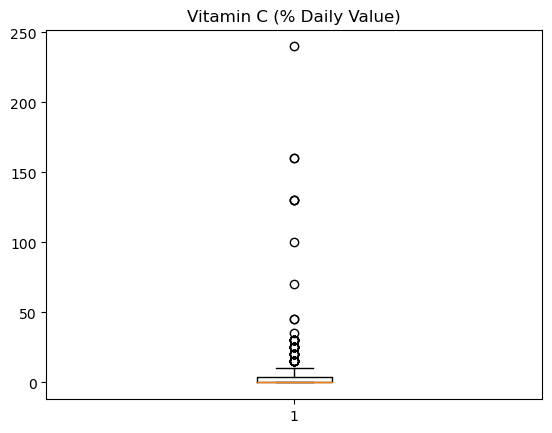

In [150]:
plt.boxplot(df[['Total Fat']])
plt.title('Total Fat')
plt.show()

plt.boxplot(df[['Saturated Fat (% Daily Value)']])
plt.title('Saturated Fat (% Daily Value)')
plt.show()

plt.boxplot(df[['Vitamin C (% Daily Value)']])
plt.title('Vitamin C (% Daily Value)')
plt.show()

### 3a) Report the median and standard deviation for all numerical features.

In [151]:
value_features = ['Calories', 'Calories from Fat', 'Total Fat', 'Total Fat (% Daily Value)', 'Saturated Fat', 
           'Saturated Fat (% Daily Value)', 'Trans Fat', 'Cholesterol', 'Cholesterol (% Daily Value)',
           'Sodium', 'Sodium (% Daily Value)', 'Carbohydrates', 'Carbohydrates (% Daily Value)', 'Dietary Fiber',
           'Dietary Fiber (% Daily Value)', 'Sugars', 'Protein', 'Vitamin A (% Daily Value)', 'Vitamin C (% Daily Value)',
           'Calcium (% Daily Value)', 'Iron (% Daily Value)']
for feature in value_features:
    print(feature, "'s median: ", df[feature].median(), " ", "standard deviation: ", round(df[feature].std(), 4))


Calories 's median:  340.0   standard deviation:  240.2699
Calories from Fat 's median:  100.0   standard deviation:  127.8759
Total Fat 's median:  11.0   standard deviation:  14.206
Total Fat (% Daily Value) 's median:  17.0   standard deviation:  21.8852
Saturated Fat 's median:  5.0   standard deviation:  5.3219
Saturated Fat (% Daily Value) 's median:  24.0   standard deviation:  26.6392
Trans Fat 's median:  0.0   standard deviation:  0.4291
Cholesterol 's median:  35.0   standard deviation:  87.2693
Cholesterol (% Daily Value) 's median:  11.0   standard deviation:  29.0917
Sodium 's median:  190.0   standard deviation:  577.0263
Sodium (% Daily Value) 's median:  8.0   standard deviation:  24.035
Carbohydrates 's median:  44.0   standard deviation:  28.2522
Carbohydrates (% Daily Value) 's median:  15.0   standard deviation:  9.4195
Dietary Fiber 's median:  1.0   standard deviation:  1.5677
Dietary Fiber (% Daily Value) 's median:  5.0   standard deviation:  6.3071
Sugars 's m

### 3b) Write the code to replace outliers of all numerical features in (a) with NaN. (Hint: Use the 3 sigma deviation to find outliers). Report the total number of NaNs corresponding to each feature.

In [152]:
for feature in value_features:
    outliner_1 = df[feature].mean() + 3 * df[feature].std()
    outliner_2 = df[feature].mean() - 3 * df[feature].std()
    df.loc[df[feature] > outliner_1, feature] = np.nan
    df.loc[df[feature] < outliner_2, feature] = np.nan
for feature in value_features:
    print(feature, ": ", df[feature].isnull().sum())

Calories :  3
Calories from Fat :  3
Total Fat :  3
Total Fat (% Daily Value) :  3
Saturated Fat :  0
Saturated Fat (% Daily Value) :  0
Trans Fat :  9
Cholesterol :  4
Cholesterol (% Daily Value) :  4
Sodium :  3
Sodium (% Daily Value) :  3
Carbohydrates :  5
Carbohydrates (% Daily Value) :  5
Dietary Fiber :  4
Dietary Fiber (% Daily Value) :  4
Sugars :  3
Protein :  2
Vitamin A (% Daily Value) :  6
Vitamin C (% Daily Value) :  7
Calcium (% Daily Value) :  0
Iron (% Daily Value) :  3


### 3c) Write the code to replace the missing values ( NaN) with mean values. Report the median and standard deviation. Compare your result with (a) and write one sentence to explain your discovery
> Answer: I noticed that the standard deviation is smaller after we replace the outliners with each feature's mean beacause all the data are closer together.

In [153]:
for feature in value_features:
    df[feature].replace(np.nan, df[feature].mean(), inplace=True)
for feature in value_features:
    print(feature, "'s median: ", df[feature].median(), " ", "standard deviation: ", round(df[feature].std(), 4))

Calories 's median:  340.0   standard deviation:  210.71
Calories from Fat 's median:  100.0   standard deviation:  107.9862
Total Fat 's median:  11.0   standard deviation:  11.9892
Total Fat (% Daily Value) 's median:  17.0   standard deviation:  18.4524
Saturated Fat 's median:  5.0   standard deviation:  5.3219
Saturated Fat (% Daily Value) 's median:  24.0   standard deviation:  26.6392
Trans Fat 's median:  0.0   standard deviation:  0.3308
Cholesterol 's median:  35.0   standard deviation:  59.4449
Cholesterol (% Daily Value) 's median:  11.0   standard deviation:  19.8054
Sodium 's median:  190.0   standard deviation:  520.2296
Sodium (% Daily Value) 's median:  8.0   standard deviation:  21.6764
Carbohydrates 's median:  44.0   standard deviation:  25.2251
Carbohydrates (% Daily Value) 's median:  15.0   standard deviation:  8.4105
Dietary Fiber 's median:  1.0   standard deviation:  1.4162
Dietary Fiber (% Daily Value) 's median:  5.0   standard deviation:  5.7052
Sugars 's m

### 4a) Train a predictor to predict the Calories as follows:
> Calorie = $\theta_{0}$ + $\theta_{1}$ *  [Carbohydrates] + $\theta_{2}$ * [Protein] + $\theta_{3}$ * [Total Fat]
### Report the values of $\theta_{0}$, $\theta_{1}$, $\theta_{2}$, $\theta_{3}$. Briefly describe your interpretation of these values, i.e., what do $\theta_{0}$, $\theta_{1}$, $\theta_{2}$, $\theta_{3}$ represent? Explain these in terms of the features and labels.
> Answer: $\theta_{1}$, $\theta_{2}$, $\theta_{3}$ represent how much we should weight Carbohydrates, Protein and Total Fat in this prediction model respectively and $\theta_{0}$ represents the bia of this model.

In [154]:
lr = LinearRegression()
x = df[['Carbohydrates', 'Protein', 'Total Fat']]
y = df[['Calories']]
lr.fit(x, y)
print("theta_0: ", lr.intercept_[0])
print("theta_1:", lr.coef_[0][0])
print("theta_2:", lr.coef_[0][1])
print("theta_3:", lr.coef_[0][2])

theta_0:  24.66740849720702
theta_1: 3.343922671290474
theta_2: 4.2381063371888885
theta_3: 9.303099431615152


### 4b) Train another predictor to predict the Calories as follows:
> Calories = $\theta_{0}$ + $\theta_{1}$ * [Total Fat]. 

### Note that the coefficient here might be different than the one from (a) though they refer to the same feature. Provide an explanation as to why these coefficients might vary significantly.

> Answer: The $\theta_{0}$ and $\theta_{1}$ is different from previous predict model because we only weight the Total Fat feature for the model and it is largely depend on weight of Total Fat instead of depending on multiple features from previous model.

In [155]:
lm = LinearRegression()
lm.fit(df[['Total Fat']], df[['Calories']])
print("theta_0: ", lm.intercept_[0])
print("theta_1:", lm.coef_[0][0])

theta_0:  159.27885100524384
theta_1: 14.711356730020993


### 4c) Split the data into two fractions – the first 90% for training, and the remaining 10% testing (based on the order they appear in the file). Train the model using all the features available in the training set only. What is the model’s MSE on the training and on the test set? Did it perform too well on the training set than the test set? If yes, what could be the reason?

> Answer: This model perform better on training set than the test set because the model use 90% of the data to train the model which largely depend on the training data, it's performance is better on training data than any other non training data.

In [156]:
x_train, x_test, y_train, y_test = train_test_split(df[value_features[1:]], df[value_features[0]], train_size=0.9, test_size = 0.1, shuffle = False)
l = LinearRegression()
l.fit(x_train, y_train)

LinearRegression()

In [157]:
y_pred_train = l.predict(x_train)
y_pred_test = l.predict(x_test)
print("x_train MSE: ", mean_squared_error(y_train, y_pred_train))
print("x_test MSE: ", mean_squared_error(y_test, y_pred_test))

x_train MSE:  2896.453540398109
x_test MSE:  23961.498188102683


### 5a) Express odds of predicting label 1 in terms of weights and features. Hint: odds of an event E = probability of the event E / (1 − probability of the event E ). In our case, E = predicting label 1.

### f = $b + \theta_{0}$ + $\theta_{1}$ * $x_{1}$ + $\theta_{2}$ * $x_{2}$ + $\theta_{3}$ * $x_{3}$ + ... +  $\theta_{n}$ * $x_{n}$
### P(1) = 1 / (1 + e^(-f)) > 0.5

### 5b) Increase one feature value $(x_{i})$ by 1 and let all other features remain the same. What is the ratio of new odds of predicting label 1 to the old odds of predicting label 1? What can we infer from this expression? Can we deduce anything about the weights?

1. If the ratio of new odds of predicting label 1 to the old odds of predicting label 1 is greater than 1 then $x_{i}$ has a positive influence to the predicting function.
2. If the ratio of new odds of predicting label 1 to the old odds of predicting label 1 is equal to 1 then $x_{i}$ has no influence to the predicting function.
3. If the ratio of new odds of predicting label 1 to the old odds of predicting label 1 is less than 1 then $x_{i}$ has a negative influence to the predicting function.